In [ ]:
%pip install numpy matplotlib pennylane

In [1]:
import matplotlib.pyplot as plt
import pennylane as qml
from pennylane.templates import QuantumPhaseEstimation
from pennylane import numpy as np

[5.36297492 3.85419124]


(<Figure size 1100x500 with 1 Axes>, <Axes: >)

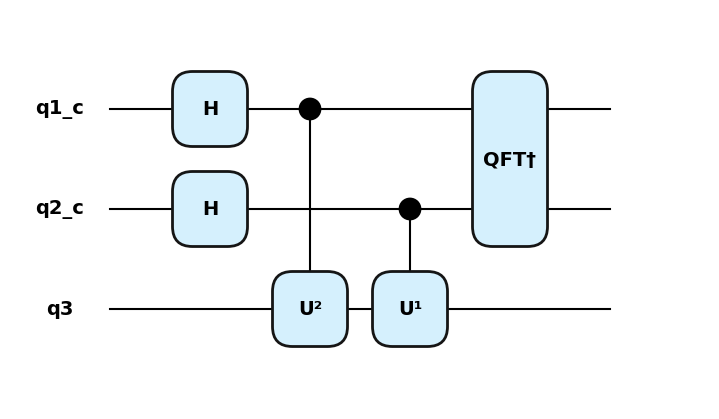

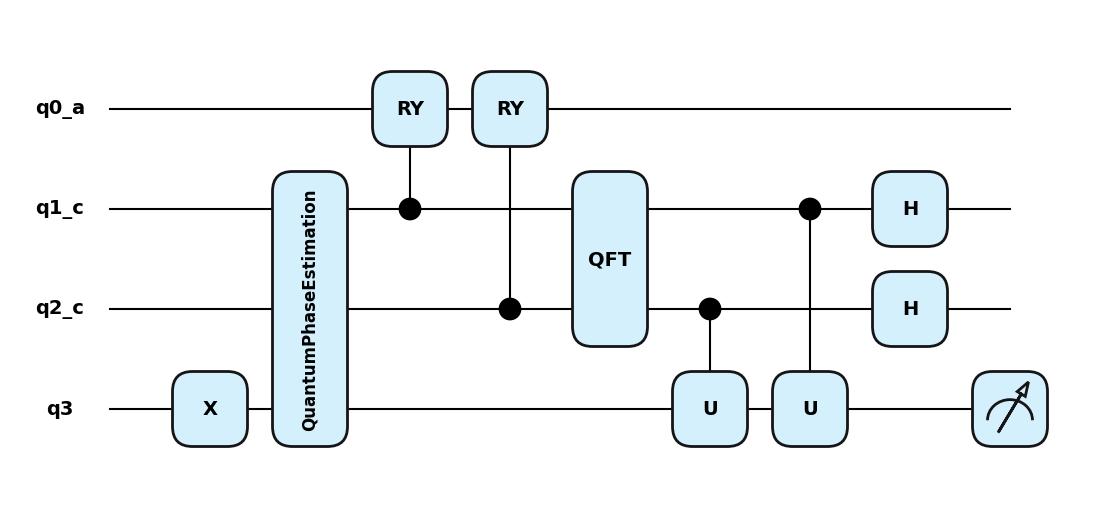

In [110]:
# Given vector, b and Hermitian matrix A
b = np.array([3/2, 1/2])
A = np.array([[1, 1/2], [1/2, 1]])

m = np.linalg.norm(b)
b_normalized = b / m

# Define the quantum device
num_wires = 4
dev = qml.device("default.qubit")
ancilla_wire = 'q0_a'
clock_wires = ['q1_c','q2_c']
input_wire = 'q3'
t = np.pi   # You can set t to any value

# Calculate theta based on normalized components
theta = 2 * np.arccos(b_normalized[0])  # RY gate angle
# print("Theta:", theta)

dev = qml.device("default.qubit")
ancilla_wire = 'q0_a'
clock_wires = ['q1_c','q2_c']
input_wire = 'q3'


unitary = np.exp(1j*A*t)
unitary_inv = np.exp(-1j * A * t)
unitary_inv_sq = np.exp(-2j * A * t)

@qml.qnode(dev)
def circuit(ancilla_wire, clock_wires, input_wire):
    all_wires = [ancilla_wire, clock_wires[0], clock_wires[1] ,input_wire]
    # Prepare the state using RY
    # qml.RY(theta, wires=input_wire)  # Apply RY gate to prepare |b>
    qml.PauliX(input_wire)
    qml.QuantumPhaseEstimation(
        unitary,
        target_wires=input_wire,
        estimation_wires=clock_wires,
    )

    qml.CRY(np.pi*0.2164, wires=[clock_wires[0], ancilla_wire])
    qml.CRY(np.pi, wires=[clock_wires[1], ancilla_wire])
    qml.QFT(wires=clock_wires)
    qml.ControlledQubitUnitary(unitary_inv, control_wires=clock_wires[1], wires=input_wire)
    qml.ControlledQubitUnitary(unitary_inv_sq, control_wires=clock_wires[0], wires=input_wire)
    qml.Hadamard(wires=clock_wires[0])
    qml.Hadamard(wires=clock_wires[1])

    # Measure the qubit using Pauli-Z observable
    return qml.state



print(circuit(ancilla_wire, clock_wires, input_wire))
qml.draw_mpl(QuantumPhaseEstimation(unitary,target_wires=input_wire,estimation_wires=clock_wires).decomposition, style="pennylane")()
qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)(ancilla_wire, clock_wires, input_wire)


[[-0.10543412+0.j        ]
 [ 0.45624749+0.j        ]
 [ 0.        -0.10543412j]
 [ 0.        +0.14001972j]
 [ 0.        +0.10543412j]
 [ 0.        -0.14001972j]
 [-0.10543412+0.j        ]
 [ 0.45624749+0.j        ]
 [-0.10543412+0.j        ]
 [ 0.14001972+0.j        ]
 [ 0.        -0.10543412j]
 [ 0.        +0.45624749j]
 [ 0.        +0.10543412j]
 [ 0.        -0.45624749j]
 [-0.10543412+0.j        ]
 [ 0.14001972+0.j        ]]


(<Figure size 1100x500 with 1 Axes>, <Axes: >)

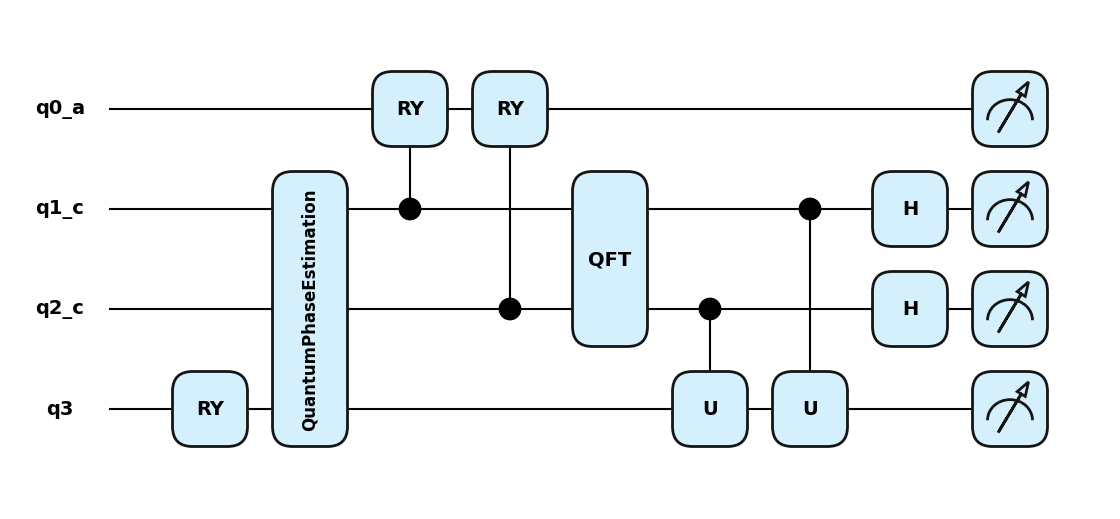

In [114]:
b = np.array([3/2, 1/2])
A = np.array([[1, 1/2], [1/2, 1]])

m = np.linalg.norm(b)
b_normalized = b / m

# Define the quantum device
num_wires = 4
dev = qml.device("default.qubit")
ancilla_wire = 'q0_a'
clock_wires = ['q1_c','q2_c']
input_wire = 'q3'
t = np.pi   # You can set t to any value

# Calculate theta based on normalized components
theta = 2 * np.arccos(b_normalized[0])  # RY gate angle
# print("Theta:", theta)

dev = qml.device("default.qubit")
ancilla_wire = 'q0_a'
clock_wires = ['q1_c','q2_c']
input_wire = 'q3'


U = np.array([[0, -1j], [-1j, 0]])
U_sq = U ** 2
U_inv = U
U_inv_sq = np.array([[1, 0],[0,1]])


@qml.qnode(dev)
def circuit(ancilla_wire, clock_wires, input_wire):
    all_wires = [ancilla_wire, clock_wires[0], clock_wires[1] ,input_wire]
    # Prepare the state using RY
    # qml.PauliX(wires=input_wire)
    qml.RY(theta, wires=input_wire)  # Apply RY gate to prepare |b>
    qml.QuantumPhaseEstimation(
        U,
        target_wires=input_wire,
        estimation_wires=clock_wires,
    )


    qml.CRY(np.pi*0.2164, wires=[clock_wires[0], ancilla_wire])
    qml.CRY(np.pi, wires=[clock_wires[1], ancilla_wire])

    #Inverse QPE
    qml.QFT(wires=clock_wires)
    qml.ControlledQubitUnitary(U_inv_sq, control_wires=clock_wires[1], wires=input_wire)
    qml.ControlledQubitUnitary(U_inv, control_wires=clock_wires[0], wires=input_wire)
    qml.Hadamard(wires=clock_wires[0])
    qml.Hadamard(wires=clock_wires[1])

    # Measure the qubit using Pauli-Z observable
    # return qml.probs(clock_wires)
    return qml.state()
# phase_estimated = np.argmax(circuit(ancilla_wire, clock_wires, input_wire)) / 2 ** 2
# phase_estimated = 4 * np.pi * (1 - phase_estimated)
# print(phase_estimated)
result = circuit(ancilla_wire, clock_wires, input_wire)
column_vector = result.reshape(-1, 1)

print(column_vector)
# print((result))
# qml.draw_mpl(QuantumPhaseEstimation(unitary,target_wires=input_wire,estimation_wires=clock_wires).decomposition, style="pennylane")()
qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)(ancilla_wire, clock_wires, input_wire)

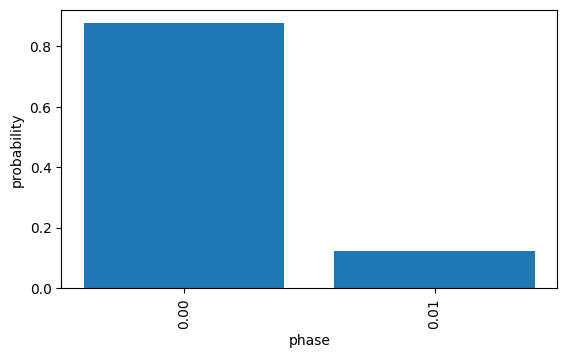

In [98]:
import matplotlib.pyplot as plt


results = circuit(ancilla_wire, clock_wires, input_wire)

bit_strings = [f"0.{x:0{len(results)}b}" for x in range(len(results))]

plt.bar(bit_strings, results)
plt.xlabel("phase")
plt.ylabel("probability")
plt.xticks(rotation="vertical")
plt.subplots_adjust(bottom=0.3)

plt.show()